# KKUI CIT Course - Neural networks - Week_02 - Linear regression (basic)

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Prepare data
This line separates the data into two variables: X contains the features (attributes) of the dataset, while y contains the corresponding labels (target variable). X is a 2-dimensional array where each row represents a sample and each column represents a feature. y is a 1-dimensional array containing the labels for each sample.

Overall, this code loads the Breast Cancer dataset and separates it into features (X) and labels (y), which are then ready for further processing such as training a neural network model.

In [2]:
# Loading the Breast Cancer dataset
my_data = datasets.load_breast_cancer()
# Separating features (X) and labels (y) from the dataset
X, y = my_data.data, my_data.target

In [3]:
# Show out input data
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
my_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
my_data["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Data visualization

ChatGPT
Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are both popular dimensionality reduction techniques, but they have different underlying principles and are suitable for different tasks.

PCA (Principal Component Analysis):
PCA is a linear dimensionality reduction technique that seeks to find the directions (principal components) in which the data has the maximum variance.
It transforms the original features into a new set of orthogonal features (principal components) that are linear combinations of the original features.
The principal components are ordered by the amount of variance they explain in the data, so the first few components capture the most variance.
PCA is useful for reducing the dimensionality of data while preserving as much variance as possible. It is widely used for data compression, visualization, and noise reduction.
t-SNE (t-Distributed Stochastic Neighbor Embedding):
t-SNE is a non-linear dimensionality reduction technique that focuses on preserving the local structure of the data.
It transforms the high-dimensional data into a lower-dimensional space (typically 2D or 3D) by modeling the similarity of data points as probabilities in both the original and reduced dimensions.
t-SNE aims to represent similar data points as nearby points in the low-dimensional space while dissimilar points are represented as distant points.
It is particularly effective for visualizing high-dimensional data clusters and uncovering the local relationships between data points.
t-SNE is commonly used for exploratory data analysis, visualization, and clustering.

In [143]:
import plotly.graph_objs as go
import plotly.io as pio

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get target names
target_names = my_data["target_names"]

# Create hover text for labels
hover_text = [f'Target: {target_names[label]}<br>Attributes (only first 5): {", ".join(map(str, attrs[0:5]))}'
              for label, attrs in zip(y, X)]

# Create trace for data points
trace = go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    hovertext=hover_text,
    marker=dict(
        size=7,
        color=y,
        colorscale='Viridis',
        line=dict(
            color='rgb(0, 0, 0)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    title='Data Distribution in 2D (PCA)',
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 2'),
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show interactive plot
pio.show(fig)


In [147]:
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.manifold import TSNE

# Apply t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Get target names
target_names = my_data["target_names"]

# Create hover text for labels
hover_text = [f'Target: {target_names[label]}<br>Attributes (only first 5): {", ".join(map(str, attrs[0:5]))}'
              for label, attrs in zip(y, X)]

# Create trace for data points
trace = go.Scatter(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    mode='markers',
    hovertext=hover_text,
    marker=dict(
        size=7,
        color=y,
        colorscale='Viridis',
        line=dict(
            color='rgb(0, 0, 0)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    title='Data Distribution in 2D (t-SNE)',
    xaxis=dict(title='Component 1'),
    yaxis=dict(title='Component 2'),
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show interactive plot
pio.show(fig)


In [144]:
import plotly.graph_objs as go
import plotly.io as pio

# Apply PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Get target names
target_names = my_data["target_names"]

# Create hover text for labels
hover_text = [f'Target: {target_names[label]}<br>Attributes (only first 5): {", ".join(map(str, attrs[0:5]))}'
              for label, attrs in zip(y, X)]

# Create trace for data points
trace = go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    hovertext=hover_text,
    marker=dict(
        size=5,
        color=y,
        colorscale='Viridis',
        line=dict(
            color='rgb(0, 0, 0)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    title='Data Distribution in 3D (PCA)',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    width=1000,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show interactive plot
pio.show(fig)


In [146]:
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.manifold import TSNE

# Apply t-SNE to reduce data to 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Get target names
target_names = my_data["target_names"]

# Create hover text for labels
hover_text = [f'Target: {target_names[label]}<br>Attributes (only first 5): {", ".join(map(str, attrs[0:5]))}'
              for label, attrs in zip(y, X)]

# Create trace for data points
trace = go.Scatter3d(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    z=X_tsne[:, 2],
    mode='markers',
    hovertext=hover_text,
    marker=dict(
        size=5,
        color=y,
        colorscale='Viridis',
        line=dict(
            color='rgb(0, 0, 0)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    title='Data Distribution in 3D (t-SNE)',
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3')
    ),
    width=1000,  # Set the width of the plot
    height=1000  # Set the height of the plot
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show interactive plot
pio.show(fig)


### Data splitting
This line calculates the number of samples and features in the dataset. X.shape returns a tuple where the first element represents the number of samples (rows) and the second element represents the number of features (columns) in the dataset. By unpacking this tuple into n_samples and n_features, you can easily access these values for further processing.

In [7]:
# Getting the number of samples and features in the dataset
n_samples, n_features = X.shape

This line splits the dataset into training and testing sets using the train_test_split() function from the sklearn.model_selection module. It takes four main arguments:
- X: The features of the dataset.
- y: The labels of the dataset.
- test_size: The proportion of the dataset to include in the test split. Here, it's set to 0.2, meaning 20% of the data will be used for testing.
- random_state: Controls the shuffling applied to the data before splitting. It ensures reproducibility of the split. Setting a specific random_state (in this case, 1234) ensures that the same random split is obtained each time you run the code.

After this line executes, you'll have four sets of data:

X_train: The features of the training set.
X_test: The features of the testing set.
y_train: The labels of the training set.
y_test: The labels of the testing set.

In [94]:
# Splitting the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)


### Data normalization
Normalization is the process of scaling individual samples to have a mean of 0 and a standard deviation of 1. This is important for many machine learning algorithms, including neural networks, because it ensures that features are on a similar scale.

StandardScaler is a class from the sklearn.preprocessing module that performs this normalization.

sc.fit_transform(X_train): This line fits the StandardScaler instance sc to the training data X_train and transforms it. This means that it computes the mean and standard deviation of each feature in X_train and then transforms X_train based on these statistics.
sc.transform(X_test): This line applies the transformation computed from the training data to the testing data X_test. It uses the mean and standard deviation calculated during the fitting step on the training data.

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_temp = sc.transform(X_temp)

In [96]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

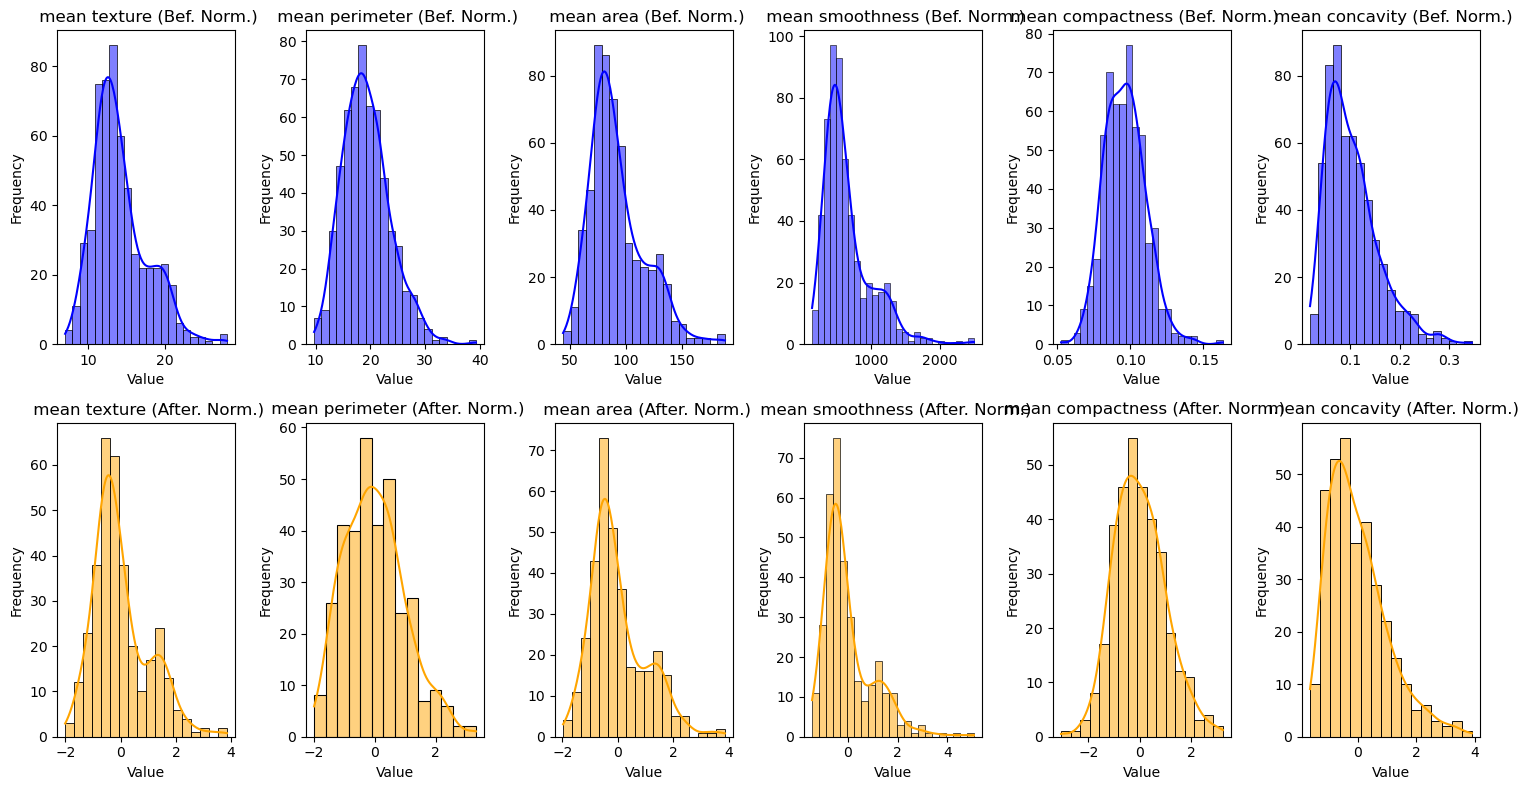

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))

# Plot histograms for data before normalization
for i in range(0,6):
    sns.histplot(X[:, i], ax=axs[0, i], kde=True, color='blue', alpha=0.5)
    axs[0, i].set_title(f' {my_data["feature_names"][i+1]} (Bef. Norm.)')
    axs[0, i].set_xlabel('Value')
    axs[0, i].set_ylabel('Frequency')

# Plot histograms for data after normalization
for i in range(0,6):
    sns.histplot(X_train[:, i], ax=axs[1, i], kde=True, color='orange', alpha=0.5)
    axs[1, i].set_title(f' {my_data["feature_names"][i+1]} (After. Norm.)')
    axs[1, i].set_xlabel('Value')
    axs[1, i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Data transformation -> numpy to torch

In [98]:
# Convert numpy arrays to PyTorch tensors for training, validation, and testing data
X_train = torch.from_numpy(X_train.astype(np.float32))
X_val = torch.from_numpy(X_val.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_val = torch.from_numpy(y_val.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# Reshape target tensors to have shape (batch_size, 1)
y_train = y_train.view(y_train.shape[0], 1)
y_val = y_val.view(y_val.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

## Model
The `MyModelLogistic` class defines the logistic regression model. It inherits from `nn.Module`, the base class for all neural network modules in PyTorch.

- `__init__()` method initializes the model. It takes the number of input features as an argument (`n_input_features`).
  - Inside `__init__`, a linear layer (`self.linear`) is defined using `nn.Linear`. It maps the input features to a single output. This layer represents the equation $f = wx + b$, where `w` are the weights, `x` is the input, and `b` is the bias.
- `forward()` method defines the forward pass of the model. It takes input tensor `x` and applies the linear transformation followed by the sigmoid activation function. The result is the predicted output (`y_pred`).

### Model Initialization:

The number of samples and features in the dataset (`n_samples`, `n_features`) are obtained from the shape of the input data (`X.shape`).

An instance of `MyModelLogistic` is created (`model`) with `n_features` passed as the number of input features.

### Parameter Access:

The code iterates over the parameters of the model using `model.parameters()`.

Inside the loop, each parameter (weights and bias) is printed. These parameters are initialized randomly and will be updated during training to minimize the loss function.


In [125]:
# Linear model f = wx + b , sigmoid at the end
class MyModelLogistic(nn.Module):
    def __init__(self, n_input_features):
        super(MyModelLogistic, self).__init__()
        # Define a linear layer with input size n_input_features and output size 1
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        # Perform the linear transformation followed by the sigmoid activation function
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


# Get the number of samples and features in the dataset
n_samples, n_features = X.shape

# Create an instance of the MyModelLogistic class with the number of input features as the argument
model = MyModelLogistic(n_features)

# Accessing parameters
for param in model.parameters():
    # Print each parameter of the model (weights and bias)
    print(param)


Parameter containing:
tensor([[-0.1357, -0.0684,  0.0640,  0.1703, -0.0163, -0.1788,  0.1159, -0.1195,
          0.0835,  0.0547,  0.0747,  0.0978,  0.0383, -0.1799, -0.1554, -0.1349,
          0.1593, -0.1683,  0.1744, -0.1069,  0.1454,  0.0597,  0.0613, -0.0120,
         -0.1504,  0.0335, -0.0847, -0.0712,  0.1590, -0.1684]],
       requires_grad=True)
Parameter containing:
tensor([0.0064], requires_grad=True)


## Loss and optimizer

In [126]:
num_epochs = 1000
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Train loop

In [127]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Forward pass and loss for training set
    model.train()  # Set the model to training mode
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)

    # Backward pass and update
    train_loss.backward()
    optimizer.step()

    # Zero gradients before new step
    optimizer.zero_grad()

    # Calculate training accuracy
    train_predictions = torch.round(train_outputs)
    train_correct = (train_predictions == y_train).sum().item()
    train_acc = train_correct / len(y_train)

    # Forward pass for validation set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to compute gradients for validation
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)

        # Calculate validation accuracy
        val_predictions = torch.round(val_outputs)
        val_correct = (val_predictions == y_val).sum().item()
        val_acc = val_correct / len(y_val)

    # Store losses and accuracies
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Logging
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {train_loss.item():.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}')


Epoch [10/1000], Train Loss: 0.6029, Train Acc: 0.7097, Val Loss: 0.6324, Val Acc: 0.6579
Epoch [20/1000], Train Loss: 0.5502, Train Acc: 0.7859, Val Loss: 0.5811, Val Acc: 0.7281
Epoch [30/1000], Train Loss: 0.5047, Train Acc: 0.8065, Val Loss: 0.5369, Val Acc: 0.7632
Epoch [40/1000], Train Loss: 0.4657, Train Acc: 0.8299, Val Loss: 0.4992, Val Acc: 0.8333
Epoch [50/1000], Train Loss: 0.4323, Train Acc: 0.8592, Val Loss: 0.4668, Val Acc: 0.8421
Epoch [60/1000], Train Loss: 0.4034, Train Acc: 0.8915, Val Loss: 0.4388, Val Acc: 0.8596
Epoch [70/1000], Train Loss: 0.3783, Train Acc: 0.8944, Val Loss: 0.4146, Val Acc: 0.8684
Epoch [80/1000], Train Loss: 0.3562, Train Acc: 0.8974, Val Loss: 0.3935, Val Acc: 0.8772
Epoch [90/1000], Train Loss: 0.3366, Train Acc: 0.9091, Val Loss: 0.3748, Val Acc: 0.8947
Epoch [100/1000], Train Loss: 0.3192, Train Acc: 0.9208, Val Loss: 0.3581, Val Acc: 0.8947
Epoch [110/1000], Train Loss: 0.3035, Train Acc: 0.9208, Val Loss: 0.3433, Val Acc: 0.9035
Epoch [1

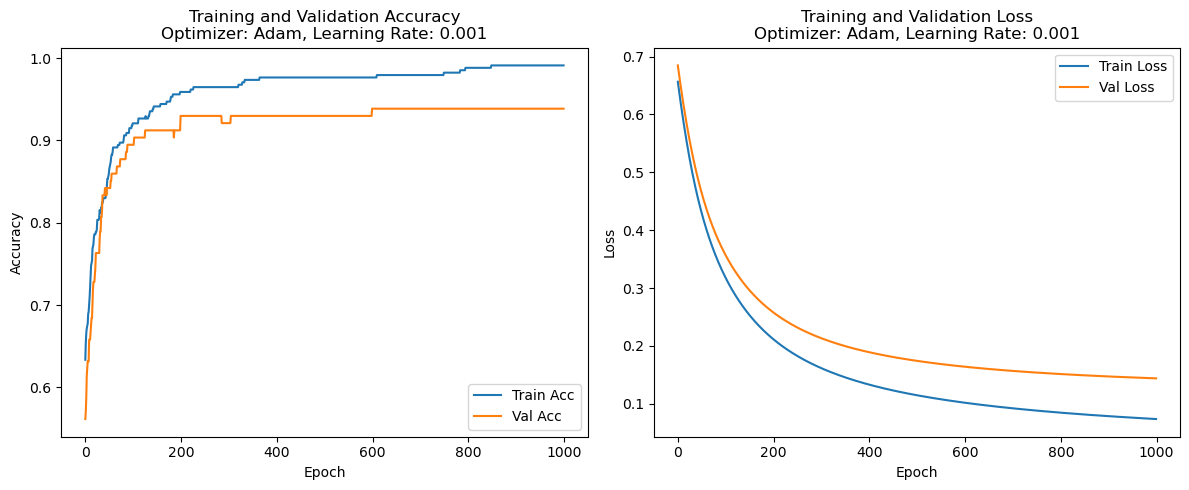

In [128]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.title(f'Training and Validation Accuracy\nOptimizer: {optimizer.__class__.__name__}, Learning Rate: {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title(f'Training and Validation Loss\nOptimizer: {optimizer.__class__.__name__}, Learning Rate: {learning_rate}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Test loop

In [130]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9561
